In [1]:
import random
import numpy as np
import networkx as nx
import itertools
import random

In [2]:
def reliability(n,A,p):
    n_exp = 1000
    n_s = 0
    for i in range(n_exp):
        Arand=np.random.rand(n,n)
        #print(Arand)
        Arand=np.where(Arand<p,A,0)
        #print(Arand)
        G = nx.from_numpy_array(Arand)
        if nx.is_connected(G):
            n_s += 1
    R = n_s/n_exp
    return R 

In [3]:
A=np.array([[0, 1, 1, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [1, 0, 0, 0]])
n = 4
p=0.7
reliability(n,A,p)

0.904

[[0 0 1 1 0]
 [0 0 0 0 1]
 [1 0 0 1 1]
 [1 0 1 0 1]
 [0 1 1 1 0]]


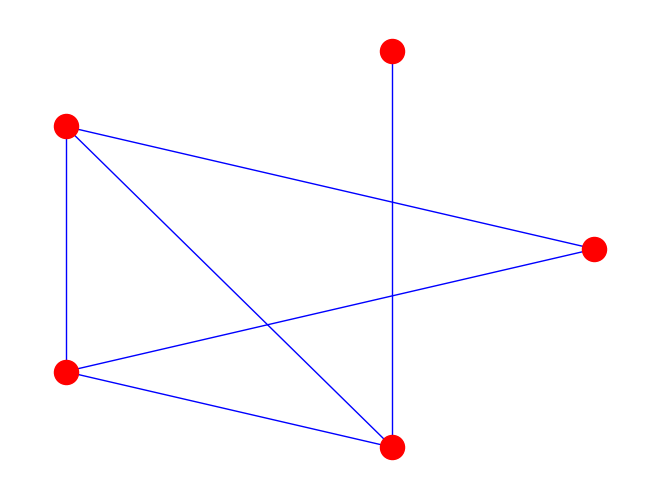

In [4]:
G = nx.generators.random_graphs.dense_gnm_random_graph(5,6)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')
Y = nx.adjacency_matrix(G)
Y=Y.todense()
reliability(5,Y,0.6)
print(Y)

In [5]:
%%time
def generate_all_possible_networks(num_nodes, num_edges):
    
    nodes = range(num_nodes)
    all_edges = list(itertools.combinations(nodes, 2))
    all_networks = []
    i=0;
    for comb in itertools.combinations(all_edges, num_edges):
            G = nx.Graph()
            G.add_nodes_from(nodes)
            G.add_edges_from(comb)
            if(i<10):
                i=i+1
                all_networks.append(G)
            else:
                break
    print("Networks populated")
    return all_networks


num_nodes = 4
num_edges = 4
all_networks = generate_all_possible_networks(num_nodes, num_edges)
#for network in all_networks:
  #  print(nx.adjacency_matrix(network).todense())


Networks populated
CPU times: total: 0 ns
Wall time: 1 ms


In [6]:
R_array = np.array([])
for network in all_networks:
    Z = nx.adjacency_matrix(network).todense()
    R = reliability(4,Z,0.7)
    R_array = np.append(R_array, R)
    

In [7]:
mean=np.mean(R_array)
std=np.std(R_array)
print(mean, std)
print(len(R_array))

0.9026 0.02829204835284994
10


Networks populated
Adjacency matrix:
[[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Reliability: 0.949


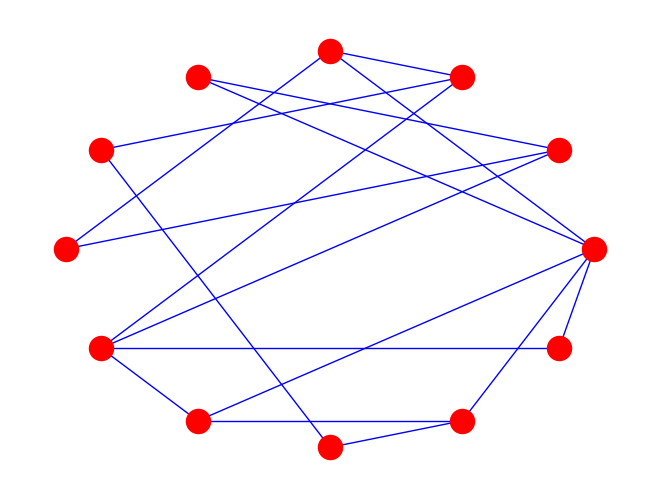

In [8]:
def fitness(network):
    return reliability(num_nodes, nx.to_numpy_array(network), p)


def mutation(network):
  
    edges = list(network.edges)
    if len(edges) > 0:
        i, j = random.choice(edges)
        network.remove_edge(i, j)
        nodes = list(network.nodes)
        i_new, j_new = random.sample(nodes, 2)
        network.add_edge(i_new, j_new)
    return network

def crossover(network1, network2):

    edges1 = set(network1.edges)
    edges2 = set(network2.edges)
    new_edges = edges1.union(edges2)
    nodes = list(network1.nodes)
    while len(new_edges) > num_edges:
   
        i, j = random.choice(list(new_edges))
        new_edges.remove((i, j))
    while len(new_edges) < num_edges:
        
        i, j = random.sample(nodes, 2)
        new_edges.add((i, j))
    new_network = nx.Graph()
    new_network.add_nodes_from(nodes)
    new_network.add_edges_from(new_edges)
    return new_network


def genetic_algorithm(population_size, num_generations):

    population = generate_all_possible_networks(num_nodes, num_edges)
    #print("Generating networks")
    fitness_values = [fitness(network) for network in population]
    best_network = population[fitness_values.index(max(fitness_values))]

    for generation in range(num_generations):
       # print("Generation:",generation+1)
        new_population = []
        for i in range(population_size):
            parent1 = random.choices(population, weights=fitness_values, k=1)[0]
            parent2 = random.choices(population, weights=fitness_values, k=1)[0]
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutation(child)
            new_population.append(child) 
        new_fitness_values = [fitness(network) for network in new_population]
        population = new_population
        fitness_values = new_fitness_values      
        if max(fitness_values) > fitness(best_network):
            best_network = population[fitness_values.index(max(fitness_values))]
    return best_network

population_size = 10
num_generations = 15
p = 0.7
num_nodes = 12
num_edges = 17
mutation_rate = 0.65

best_network = genetic_algorithm(population_size, num_generations)

A = nx.to_numpy_array(best_network)
print("Adjacency matrix:")
print(A)
print("Reliability:", reliability(num_nodes, A, p))
#nx.draw(best_network)
nx.draw(best_network, pos=nx.circular_layout(best_network), node_color='r', edge_color='b')
